In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [13]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

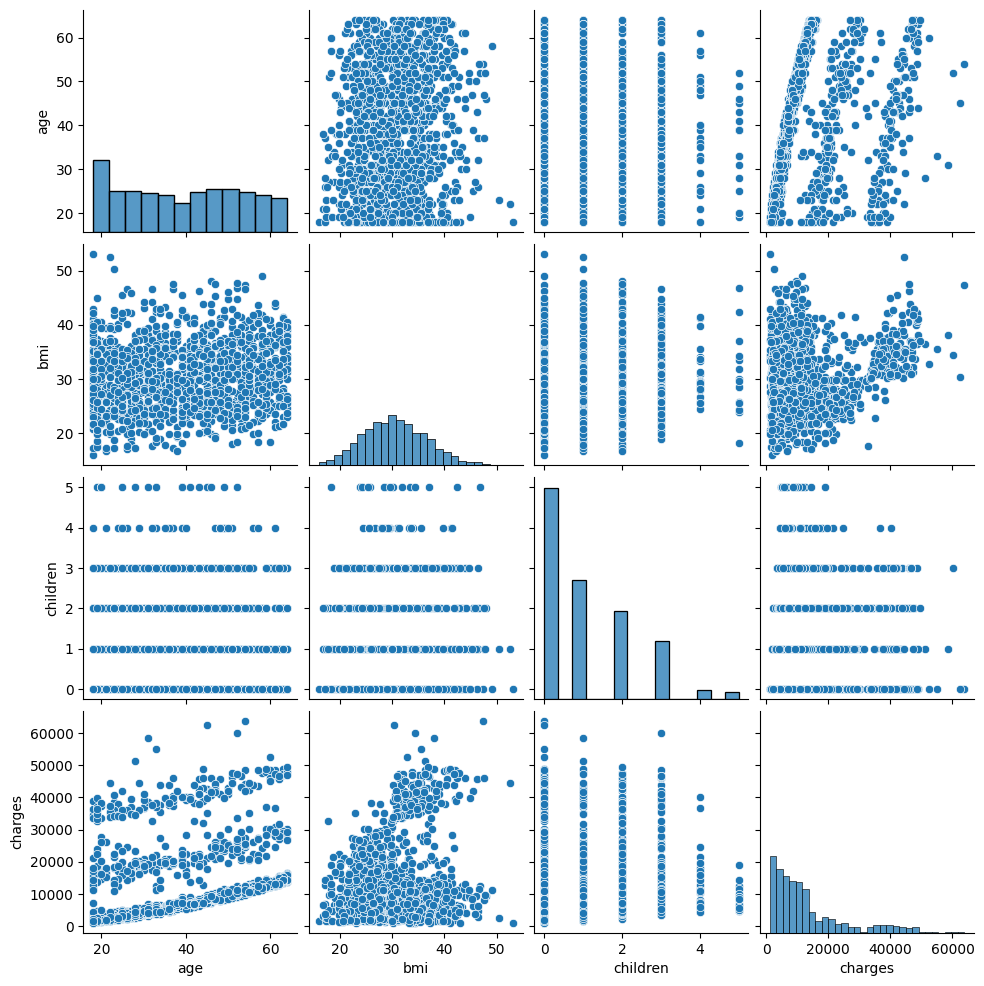

In [11]:
sns.pairplot(data=insurance_dataset)

NameError: ignored

In [14]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

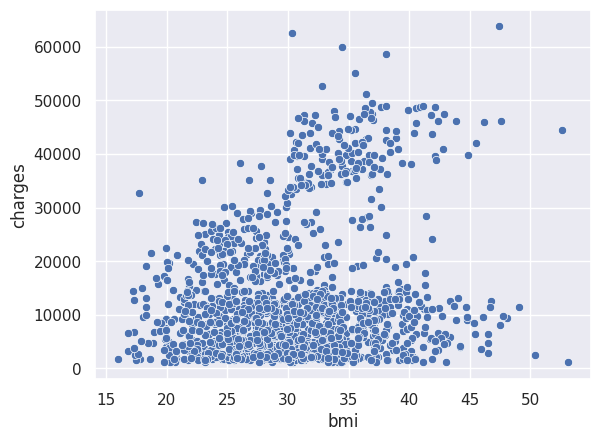

In [17]:
sns.scatterplot(x='bmi',y='charges',data=insurance_dataset)

In [16]:
sns.set()

<ipython-input-18-e79a5375a873>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


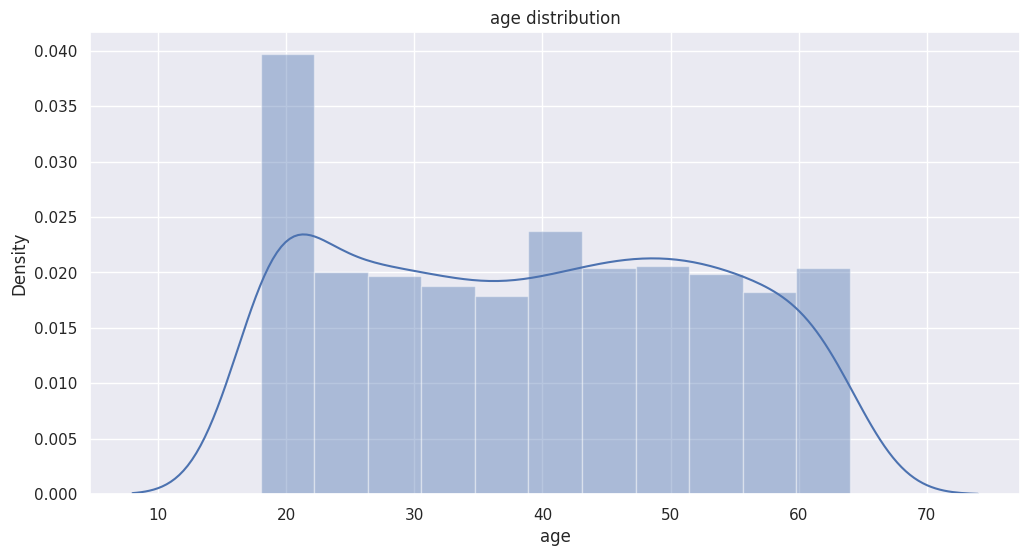

In [18]:
plt.figure(figsize=(12,6),dpi=100)
sns.distplot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

male      676
female    662
Name: sex, dtype: int64

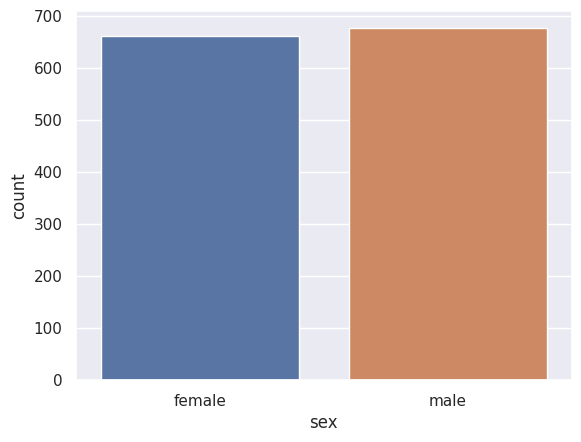

In [20]:
sns.countplot(x='sex',data=insurance_dataset)
insurance_dataset['sex'].value_counts()

<ipython-input-21-d0e3ed099e67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


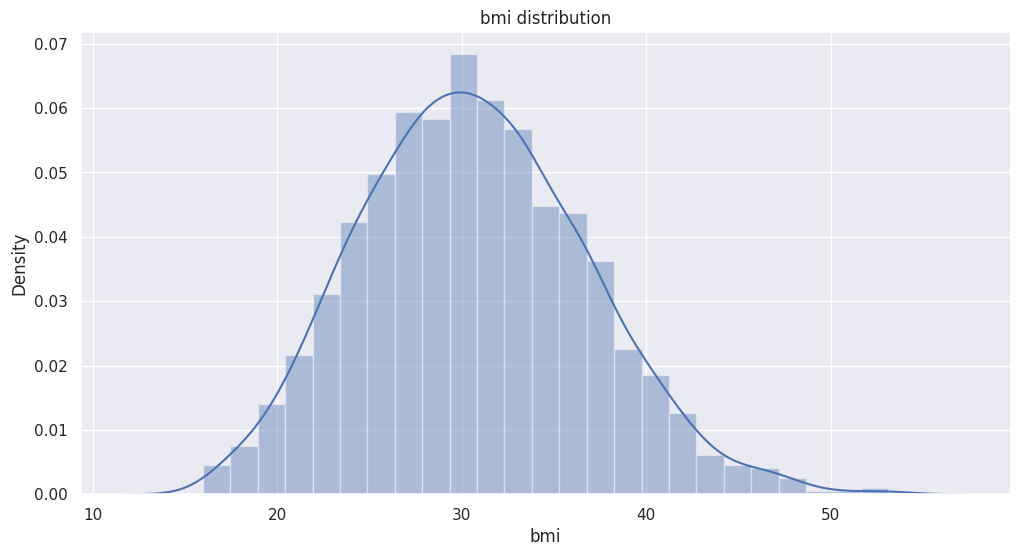

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

<Axes: xlabel='children', ylabel='count'>

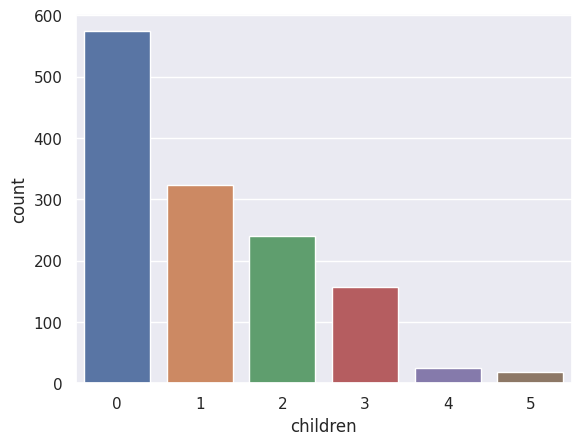

In [23]:
sns.countplot(x='children',data=insurance_dataset)

<Axes: xlabel='smoker', ylabel='count'>

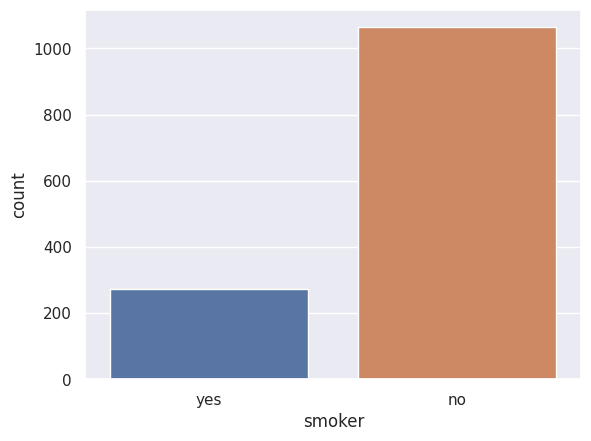

In [25]:
sns.countplot(x='smoker',data=insurance_dataset)

<Axes: xlabel='region', ylabel='count'>

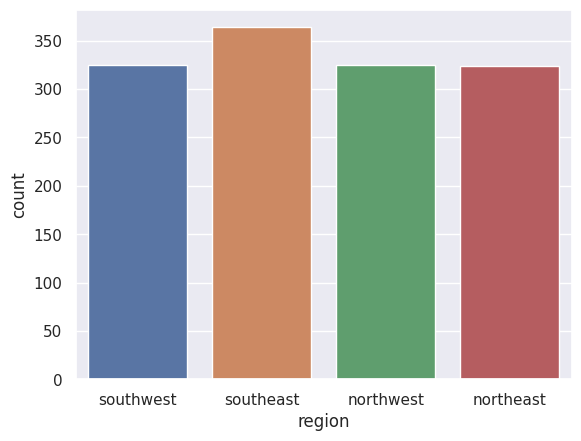

In [29]:
sns.countplot(x='region',data=insurance_dataset)

In [30]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [35]:
insurance_dataset.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':4}},inplace=True)

In [36]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,4,21984.47061
4,32,0,28.880,0,1,4,3866.85520


In [38]:
X = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [44]:
preds = model.predict(X_train)

In [46]:
# R squared metric
r2_train = metrics.r2_score(y_train,preds)
print(r2_train)

0.7514085919979442


In [47]:
from sklearn.metrics import classification_report

In [49]:
test_preds = model.predict(X_test)
r2_test = metrics.r2_score(y_test,test_preds)
print(r2_test)

0.7443018651235678


In [52]:
input_data = (31,1,25.74,0,1,0)
input_data_as_np = np.asarray(input_data)
input_data_reshape = input_data_as_np.reshape(1,-1)

In [54]:
preds_final = model.predict(input_data_reshape)
print(preds_final)

[3844.97439715]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
